In [61]:
import numpy as np
import sklearn
import skimage
import cv2
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import os


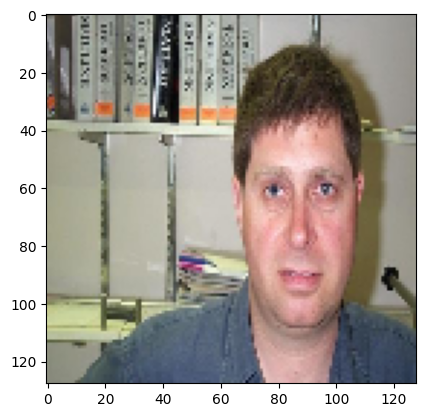

In [62]:
!pip freeze > requirements.txt
path_base = "./Faces/"

nb_faces = 435

images = np.empty((nb_faces,), dtype = object)

target_size = (128, 128)

for i in range(nb_faces):
    filename = f"image_{str(i+1).zfill(4)}.jpg"
    image = ski.io.imread(path_base+filename)
    images[i] = cv2.resize(image,target_size)
    

plt.imshow(images[0], cmap = 'gray')

# üìä Histogramme de gradient orient√© üìà

Une pr√©sentation d'Alix ANNERAUD, Capucine GARREAU, Ali√©nor TRANOUEZ et Zya PEUDEVIN.

# üöÄ Introduction 

Le **traitement d'images** est un domaine essentiel en informatique.

Ses objectifs : 
-  analyser
-  interpr√©ter
-  transformer 

La **d√©tection de caract√©ristiques** est √©tape cruciale pour extraire des informations pertinentes.

Permet : 
-  la reconnaissance d'objets 
-  la d√©tection de mouvements
-  analyse de sc√®nes

**Histogrammes de gradients orient√©s (HOG)** est une des m√©thodes les plus populaires pour **d√©tecter** et **repr√©senter** des caract√©ristiques dans les images.

## Sommaire

1. üè∫ Histoire
2. üìö Fondements th√©oriques
3. üõ†Ô∏è Applications
4. üîç √âtude de cas
5. üìä Analyse

# 2. üè∫ Histoire

## Contexte

Avant HOG on utilisait des transform√©es de Fourier, des contours de Canny ou encore des histogrammes de gradients

Mais on a besoin d'un descripteur plus **robuste** -> HOG en **2005** avec l'article: "Histograms of Oriented Gradients for Human Detection"

L'id√©e derri√®re le HOG est que la forme et la texture des objets sont captur√©es par la distribution des gradients locaux. Cette m√™me id√©e est apparue dans un brevet de **Robert K. McConnel en 1986**: "Method and Apparatus for Partern Recognition"


## Avanc√©es

Le HOG peut am√©liorer la **d√©t√©ction d'objets dans des environnements vari√©s.**

Il offre particuli√®rement une **pr√©cision accrue** sur la **d√©t√©ction de pi√©tons** par rapport aux m√©thodes pr√©c√©dentes.

Les domaines de son utilisation sont la **s√©curit√©**, la **surveillance** et les **v√©hicules autonomes**.

## Adoption et √©volution

HOG est devenue un **standard** parmis les descripteurs d'images.

Pour preuve il est m√™me int√©gr√© √† **OpenCV**.

C'est un outil **traditionnel** pris√© car **rapide et moins gourmand en ressource**.

## Impacte et Contributions du HOG

HOG est un **pr√©curseur** de nombreuses techniques de **d√©tections d'objets**.

Il a **contribu√©** √† l'am√©lioration des algorithmes de **vision par ordinateur**.

Il est populaire encore aujourd'hui par sa **robustesse** et son **efficacit√©**.

# 3. üìö Th√©orie

Nous allons maintenant vous pr√©senter la th√©orie derri√®re l'Histogramme de gradient orient√©.

## ‚úÇÔ∏è D√©coupage

- D√©coupage en cellule

- Regroupement des cellules en blocs

- Normalisation des blocs

## üìê Calcul des gradients

Dans une cellule, on calcule les gradients : 

$$
G =
\begin{cases}
    I(x+1, y) - I(x-1, y) \\
    I(x, y+1) - I(x, y-1)  
\end{cases}
$$

o√π $I$ est l'intensit√© du pixel en $(x, y)$.


On transforme ce gradient en coordonn√©es polaires :

$$
M = \sqrt{G_x^2 + G_y^2}
$$
$$
\theta = \arctan\left(\frac{G_y}{G_x}\right)
$$

On a donc un vecteur gradient $(M, \theta)$ pour chaque pixel.

## ‚öñÔ∏è Normalisation

Les histogrammes de chaques blocs sont normalis√©s:

$$
v = \frac{v}{\sqrt{\|v\|^2 + \epsilon^2}}
$$

O√π : 
- $v$ est le vecteur de l'histogramme
- $\epsilon$ est un param√®tre de normalisation

# 4. üõ†Ô∏è Applications

# 5. üîç Etude de cas

## Exemple d'un HOG

In [63]:
image = data.astronaut()

fd, hog_image = hog(
    image,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

In [64]:
%%capture out

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

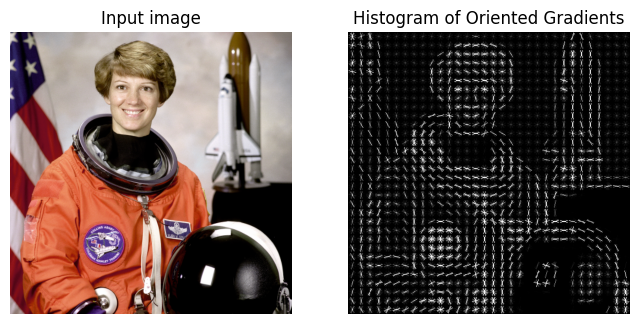

In [65]:
out()

### II/ Construction des fonctions 

#### A) Chargement des donn√©es et labellisation 

####  1. Pour le jeu de donn√©es https://www.kaggle.com/datasets/imbikramsaha/caltech-101

In [ ]:
def charger_images(path_base, number_images, target_size=(128, 192), reshape = True):

    """ Chargement des donn√©es provenant d'un m√™me dossier, √©tant nomm√©es dans le format "image_0XXX """

    # On construit un array vide qui contiendra les images 
    images = np.empty((number_images,), dtype=object)
    # Puis un array d'indices qui donnera un identifiant unique √† chaque image
    indexes = np.arange(number_images)

    # Chargement des images
    for i in range(number_images):
        
        filename = f"image_{str(i+1).zfill(4)}.jpg"
        image = ski.io.imread(path_base + filename)

        if reshape :
            
            #Chaque image est redimensionn√©e de sorte que ses 2 dimensions soient des multples de 8
            image = cv2.resize(image, target_size)

        images[i] = image

    return images, indexes

In [67]:
def labelize_people(number_images) : 

    """ On labellise √† la main les images : chaque personne diff√©rente a sa propre classe. """

    labels = np.zeros((number_images,1), dtype=int)

    labels[0:22] = 0
    labels[22:41] = 1
    labels[41:46] = 2
    labels[46:68] = 3
    labels[68:89] = 4
    labels[89:112] = 5
    labels[112:132] = 6
    labels[132:137] = 7
    labels[137:158] = 8
    labels[158:163] = 9
    labels[163:168] = 10
    labels[168:173] = 11
    labels[173:193] = 12
    labels[193:214] = 13
    labels[214:239] = 14
    labels[239:261] = 15
    labels[261:266] = 16
    labels[266:285] = 17
    labels[285:305] = 18
    labels[305:325] = 19
    labels[325:345] = 20
    labels[345:365] = 21
    labels[365:387] = 22
    labels[387] = 23
    labels[388] = 24 
    labels[389] = 25
    labels[390] = 26
    labels[391] =  27
    labels[392:397] = 28
    labels[397:417] = 29
    labels[417:number_images] = 30

    return labels

In [68]:
def labelize_men_woman(number_images):  

    """" On labellise √† la main les images : 0 pour un homme et 1 pour une femme. """
    
    labels = np.zeros((number_images, 1), dtype=int)

    labels[0:22] = 0
    labels[22:41] = 0  
    labels[41:46] = 0
    labels[46:68] = 0
    labels[68:89] = 1
    labels[89:112] = 0
    labels[112:132] = 1
    labels[132:137] = 0
    labels[137:158] = 0
    labels[158:163] = 0
    labels[163:168] = 1
    labels[168:173] = 1
    labels[173:193] = 1
    labels[193:214] = 0
    labels[214:239] = 0
    labels[239:261] = 0
    labels[261:266] = 0
    labels[266:285] = 1
    labels[285:305] = 0
    labels[305:325] = 0
    labels[325:345] = 1
    labels[345:365] = 1
    labels[365:387] = 0
    labels[387] = 1
    labels[388] = 0
    labels[389] = 0
    labels[390] = 0
    labels[391] = 0
    labels[392:397] = 0
    labels[397:417] = 1
    labels[417:435] = 1

    return labels

####  2. Pour le jeu de donn√©es http://host.robots.ox.ac.uk/pascal/VOC/databases.html#VOC2005_1

Sur ce jeu de donnn√©es,on v=convertit les images en noir et blanc, car la reconnaissance d'objets en embarqu√© n√©cessit√© une simplification de l'information. Par exemple, une image en noir et blanc sera 3 fois moins lourde en m√©moire qu'une image Rouge, Bleu, Vert, car elle ne dispose que d'un canal.

In [69]:
def load_dataset_from_folders(base_path, target_size=(128, 192), to_gray=True, reshape = True):

    """ Chargement des donn√©es provenant d'un dossier contenant lui-m√™me des sous-dossiers. 
        Chaque sous-dossier correspond √† une classe d'image.
    """

    images = []
    labels = []
    indexes = []
    label_map = {}
    current_index = 0

    for label_index, folder_name in enumerate(sorted(os.listdir(base_path))):
        folder_path = os.path.join(base_path, folder_name)
        if os.path.isdir(folder_path):
            label_map[label_index] = folder_name
            for filename in sorted(os.listdir(folder_path)):
                image_path = os.path.join(folder_path, filename)
                image = ski.io.imread(image_path)
                
                # Conversion en niveaux de gris avec un seul canal
                if to_gray:
                    if len(image.shape) == 3:  # Si l'image est en couleur (RGB)
                        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Conversion en niveau de gris
                    # Si l'image est d√©j√† en niveau de gris (1 canal), aucune conversion n'est effectu√©e
                    # On force l'image √† avoir une seule dimension de canal (2D)
                    image = np.squeeze(image)  # On retire toute dimension suppl√©mentaire

                if reshape : 
                    #Chaque image est redimensionn√©e de sorte que ses 2 dimensions soient des multples de 8
                    image_resized = cv2.resize(image, target_size)  
                    images.append(image_resized)

                else : 
                    images.append(image)

                labels.append(label_index)
                indexes.append(current_index)
                current_index += 1

    images = np.array(images, dtype=object)  
    labels = np.array(labels, dtype=int)    
    indexes = np.array(indexes, dtype=int)

    return images, labels, indexes, label_map

#### B) HOG

In [70]:
def HOG(images, nb_images, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1), visualize=True):
  
    from skimage.feature import hog

    hog_images = np.empty((nb_images,), dtype=object)
    hog_images_vector = np.empty((nb_images,), dtype=object)
    
    for i in range(nb_images):
    
        image = images[i]
    
        
        if len(image.shape) == 3:
            if image.shape[2] == 3:  
                image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            elif image.shape[2] == 4: 
                image = cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY)
            elif image.shape[2] == 1:  
                image = image[:, :, 0]
        
        if image.dtype != np.float64:
            image = image.astype(np.float64)
            if image.max() > 1.0:
                image /= 255.0
                
            # On calcule l'image HOG ainsi que le vecteur de caract√©ristiques
            feature_vector, hog_image = hog(
                image,
                orientations=orientations, # Nombre d'orientations possibles
                pixels_per_cell=pixels_per_cell, # Nombre de pixels par cellule
                cells_per_block=cells_per_block, # Nombre de cellules par bloc d'orientation
                visualize=visualize,  # Obtenir une version visualisable des images HOG
                feature_vector=True,  # Obtenir le vecteur caract√©ristique
                transform_sqrt=True   # Appliquer une correction gamma
            )
            
            hog_images[i] = hog_image
            hog_images_vector[i] = feature_vector  
    
    features_array = np.array([vector for vector in hog_images_vector])
    
    return hog_images, features_array

#### C) Pr√©traitement : normalisation par le maximum et s√©paration des donn√©es

In [71]:
def data_split(X, Y, indexes, train_size=0.8, test_size=0.1):

    """On divise le jeu de donn√©es en ensembles d'apprentissage, de validation et de test"""
    
    from sklearn.model_selection import train_test_split
    
    val_size = 1 - train_size - test_size
    X_train, X_test, Y_train, Y_test, indexes_train, indexes_test = train_test_split(
        X, Y, indexes, test_size=test_size, stratify=Y, shuffle=True
    )
    train_size = train_size / (1 - test_size) # On divise par 1 - test_size pour qu'au total train_size + val_size = 1
    val_size = val_size / (1 - test_size)
    X_train, X_val, Y_train, Y_val, indexes_train, indexes_val = train_test_split(
        X_train, Y_train, indexes_train, test_size=val_size, stratify=Y_train, shuffle=True
    )

    # L'option shuffle m√©lange les donn√©es pour ne pas que le mod√®le puisse apprendre de l'ordre  des donn√©es
    # L'option stratify  s√©lectionne une quantit√© √©quivalente de donn√©es de m√™mes classes pour qu'elles soient repr√©sent√©es 
    # dans tous les jeux de donn√©es.

    return X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test

In [72]:
def data_normalization(X_train, X_val, X_test):

    """ On normalise l'ensemble des datasets par la valeur maximale de l'ensemble d'apprentissage """

    X_train_max = np.max(X_train)
    X_train_normalized = np.array(X_train / X_train_max, dtype=np.float64)
    X_val_normalized = np.array(X_val / X_train_max, dtype=np.float64)
    X_test_normalized = np.array(X_test / X_train_max, dtype=np.float64)

    return X_train_normalized, X_val_normalized, X_test_normalized, X_train_max

In [73]:
def data_preprocessing(X, Y, indexes, number_images, target_size_image=(128, 192), train_size=0.8, test_size=0.1):

    """ Fonction qui regroupe les √©tapes de preprocessing """
    
    X = X.reshape(number_images, -1)
    Y = Y.reshape(number_images,)
    X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test = data_split(
        X, Y, indexes, train_size=0.8, test_size=0.1
    )
    X_train, X_val, X_test, X_train_max = data_normalization(X_train, X_val, X_test)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, X_train_max

#### D) Kernel de notre SVM : la distance de Hellinger

La distance de Hellinger entre deux vecteurs de probabilit√©s \( p \) et \( q \) est d√©finie par :

$$
H(p, q) = \sqrt{\frac{1}{2} \sum_{i} \left( \sqrt{p_i} - \sqrt{q_i} \right)^2}
$$

##### Transformation en kernel

Pour utiliser cette distance comme un kernel dans un SVM, on peut la transformer en une mesure de similarit√©, par exemple avec une exponentielle n√©gative :

$$
K(p, q) = \exp(-\gamma \cdot H(p, q)^2)
$$

o√π :


- $\gamma$  est un param√®tre positif qui contr√¥le l'impact de la distance sur la similarit√©.


In [74]:
def hellinger_distance(p, q):
    p = np.array(p)
    q = np.array(q)
    return np.sqrt(0.5 * np.sum((np.sqrt(p) - np.sqrt(q))**2))

def hellinger_kernel(X, Y=None, gamma=1.0):
    if Y is None:
        Y = X
    dists = np.array([[hellinger_distance(x, y) for y in Y] for x in X])
    return np.exp(-gamma * (dists**2))

#### E) Validation crois√©e

In [75]:
def plot_crossvalidation(val_err_rate, vect_gamma, vect_c) :

    """ Permet d'afficher la matrice de confusion de la validation crois√©e des hyperparam√®tres C et Gamma. """

    plt.figure(figsize=(10, 8))
    plt.imshow(
        val_err_rate,
        extent=[np.log10(vect_gamma.min()), np.log10(vect_gamma.max()), np.log10(vect_c.min()), np.log10(vect_c.max())],
        aspect="auto",
        origin="lower",
        cmap="viridis"
    )
    
    plt.colorbar(label="Validation Error Rate")
    plt.xlabel("Log(Gamma)")
    plt.ylabel("Log(C)")
    plt.xticks(np.log10(vect_gamma), labels=[f"{g:.2e}" for g in vect_gamma], rotation=45)
    plt.yticks(np.log10(vect_c), labels=[f"{c:.2e}" for c in vect_c])
    plt.title("Validation Error Rate across C and Gamma")
    plt.show()

def crossvalidation(X_train, X_val, Y_train, Y_val, vect_c=np.logspace(0, 4, 10), vect_gamma=np.logspace(-5, -1, 10)):

    """ Parcours d'une liste de valeurs de Gamma et C possibles afin de trouver le couple d'hyperparam√®tres 
        minimisant l'erreur. """

    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score

    print("crossvalidation")
    svm = SVC(kernel="precomputed")
    val_err_rate = np.empty((vect_c.shape[0], vect_gamma.shape[0]))
    for ind_gamma, gamma in enumerate(vect_gamma):
        K_train = hellinger_kernel(X_train, X_train, gamma)
        K_val = hellinger_kernel(X_val, X_train, gamma)
        for ind_c, c in enumerate(vect_c):
            svm.C = c
            svm.fit(K_train, Y_train)
            val_err_rate[ind_c][ind_gamma] = 1 - accuracy_score(Y_val, svm.predict(K_val))

    # On recherche le couple minimisant l'erreur de validation 
    min_index = np.unravel_index(val_err_rate.argmin(), val_err_rate.shape)
    c_optimal= vect_c[min_index[0]]
    gamma_optimal= vect_gamma[min_index[1]]

    # On affiche la matrice de confusion de Gamma et de C
    plot_crossvalidation(val_err_rate, vect_gamma, vect_c)  

    # On retourne les param√®tres optimaux
    return gamma_optimal, c_optimal


In [76]:
def crossvalidation(X_train, X_val, Y_train, Y_val, vect_c=np.logspace(0, 4, 10), vect_gamma=np.logspace(-5, -1, 10)):

    """ Parcours d'une liste de valeurs de Gamma et C possibles afin de trouver le couple d'hyperparam√®tres 
        minimisant l'erreur. """

    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score

    svm = SVC(kernel="precomputed")
    val_err_rate = np.empty((vect_c.shape[0], vect_gamma.shape[0]))
    for ind_gamma, gamma in enumerate(vect_gamma):
        K_train = hellinger_kernel(X_train, X_train, gamma)
        K_val = hellinger_kernel(X_val, X_train, gamma)
        for ind_c, c in enumerate(vect_c):
            svm.C = c
            svm.fit(K_train, Y_train)
            val_err_rate[ind_c][ind_gamma] = 1 - accuracy_score(Y_val, svm.predict(K_val))

    # On recherche le couple minimisant l'erreur de validation 
    min_index = np.unravel_index(val_err_rate.argmin(), val_err_rate.shape)
    c_optimal= vect_c[min_index[0]]
    gamma_optimal= vect_gamma[min_index[1]]

    # On affiche la matrice de confusion de Gamma et de C
    plot_crossvalidation(val_err_rate, vect_gamma, vect_c)  

    # On retourne les param√®tres optimaux
    return gamma_optimal, c_optimal

#### F) Apprentissage des param√®tres optimaux et affichage des r√©sultats

In [77]:
def learn_optimal_parameters(X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, gamma_optimal, c_optimal):
    
    """ On apprend les hyperparam√®tres qui ont donn√© l'erreur d'apprentissage la plus basse. """

    from sklearn.metrics import accuracy_score

    svm = SVC(kernel="precomputed", C=c_optimal)
    K_train = hellinger_kernel(X_train, X_train, gamma_optimal)
    K_val = hellinger_kernel(X_val, X_train, gamma_optimal)
    K_test = hellinger_kernel(X_test, X_train, gamma_optimal)
    svm.fit(K_train, Y_train)
    results_train, results_val, results_test = predict_with_indexes(svm, K_train, K_val, K_test, indexes_train, indexes_val, indexes_test)
    err_val = 1 - accuracy_score(Y_val, results_val[:, 1])
    err_test = 1 - accuracy_score(Y_test, results_test[:, 1])

    return results_train, results_val, results_test, err_val, err_test

In [78]:
def predict_with_indexes(svm, X_train, X_val, X_test, indexes_train, indexes_val, indexes_test):

    """ Concat√©nation des pr√©diction avec leur indice d'origine, permettant d'observer si une donn√©e 
        particuli√®re a bien √©t√© classifi√©e. """

    # Pr√©dictions pour chacun des ensembles de donn√©es 
    Y_train_pred = svm.predict(X_train)
    Y_val_pred = svm.predict(X_val)
    Y_test_pred = svm.predict(X_test)


    # Concat√©nation des classes pr√©d√Ætes avec leur indice 
    results_train = np.vstack((indexes_train, Y_train_pred)).T
    results_val = np.vstack((indexes_val, Y_val_pred)).T
    results_test = np.vstack((indexes_test, Y_test_pred)).T

    return results_train, results_val, results_test

In [79]:
def plot_crossvalidation(val_err_rate, vect_gamma, vect_c):
    """
    Affiche la matrice de confusion de la validation crois√©e des hyperparam√®tres C et Gamma
    et met en √©vidence la zone d'optimalit√©.
    """

    # Recherche des indices de l'erreur minimale
    min_index = np.unravel_index(val_err_rate.argmin(), val_err_rate.shape)
    optimal_c = vect_c[min_index[0]]
    optimal_gamma = vect_gamma[min_index[1]]

    plt.figure(figsize=(10, 8))
    plt.imshow(
        val_err_rate,
        extent=[np.log10(vect_gamma.min()), np.log10(vect_gamma.max()), np.log10(vect_c.min()), np.log10(vect_c.max())],
        aspect="auto",
        origin="lower",
        cmap="viridis"
    )
    plt.colorbar(label="Validation Error Rate")
    plt.xlabel("Log(Gamma)")
    plt.ylabel("Log(C)")

    # Ajouter des ticks pour les valeurs log
    plt.xticks(
        np.log10(vect_gamma),
        labels=[f"{g:.2e}" for g in vect_gamma],
        rotation=45
    )
    plt.yticks(
        np.log10(vect_c),
        labels=[f"{c:.2e}" for c in vect_c]
    )

    # Titre du graphique
    plt.title("Validation Error Rate across C and Gamma")

    # Ajouter un marqueur pour le point optimal
    plt.scatter(
        np.log10(optimal_gamma), 
        np.log10(optimal_c),
        color="red",
        label=f"Optimal (C={optimal_c:.2e}, Gamma={optimal_gamma:.2e})",
        edgecolors="white",
        s=100
    )

    # Ajouter une l√©gende
    plt.legend(loc="upper right")

    # Afficher la figure
    plt.show()

### III/ Pr√©sentation des jeux de donn√©es

#### Fonction auxiliaire d'affichages d'images

In [80]:
def plot_random_images(images, num_images=6):
    """
    S√©lectionne al√©atoirement des images depuis un tableau et les affiche.
    """

    import random
    
    # On choisit al√©atoirement des indices parmi [0, nb_images - 1]
    random_indices = random.sample(range(len(images)), num_images)
    
    # On s√©lectionne les images correspondantes
    selected_images = [images[idx] for idx in random_indices]

    #Cr√©er une grille de 3x2 pour afficher les images
    fig, axes = plt.subplots(3, 2, figsize=(10, 10))
    axes = axes.flatten()  # Convertir en liste plate pour it√©rer facilement
    
    for ax, image in zip(axes, selected_images):
        ax.imshow(image)
        ax.axis('off')  # Supprimer les axes
    
    # Supprimer les axes inutilis√©s s'il y a moins d'images que de cases
    for ax in axes[num_images:]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()


####   A) Jeu de donn√©es de visage de face : https://www.kaggle.com/datasets/imbikramsaha/caltech-101

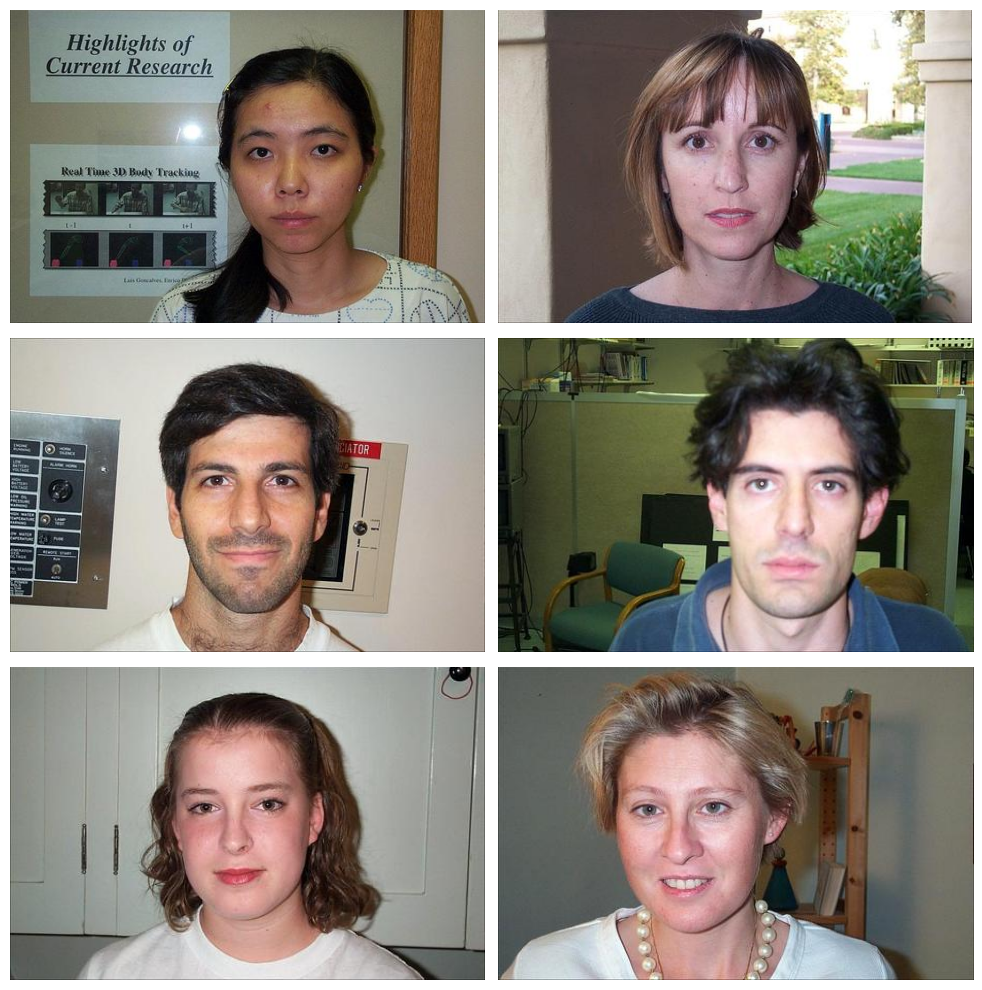

In [81]:
number_images = 435
images,_ = data_loading(path_base="./Faces/", number_images=number_images, reshape = False)
plot_random_images(images, num_images=6)

#### B) Jeu de donn√©es de voitures, bicyclettes, motos et personnes : http://host.robots.ox.ac.uk/pascal/VOC/databases.html#VOC2005_1

![V√©lo](./samples_dataset_2/bike_002.jpg)

![Personne](./samples_dataset_2/person_001.jpg)



![Voiture](./samples_dataset_2/carsgraz_001.jpg)

![Moto](./samples_dataset_2/0005.jpg)

### III/ Entra√Ænement sur diff√©rents jeu de donn√©es

#### A) HOG pour la reconnaissance faciale

In [82]:
number_images = 435

images, indexes = data_loading(path_base="./Faces/", number_images=number_images)
hog_images, X = HOG(images, number_images)
Y = labelize_people(number_images)

X = np.concatenate((X[:387], X[392:]))
Y = np.concatenate((Y[:387], Y[392:]))
indexes = np.concatenate((indexes[:387], indexes[392:]))

number_images = 430
Y = Y.reshape(number_images,)

X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, X_train_max = data_preprocessing(
    X, Y, indexes, number_images, train_size = 0.7, test_size = 0.15
)
gamma_optimal, c_optimal = crossvalidation(X_train, X_val, Y_train, Y_val)
results_train, results_val, results_test, err_val, err_test = learn_optimal_parameters(
    X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, gamma_optimal, c_optimal
)

print("Validation Error Rate:", err_val)
print("Test Error Rate:", err_test)

KeyboardInterrupt: 

Le taux d'erreur est important, de 45%. Mais il faut prendre en compte que la taille de notre jeu de donn√©es (430 entr√©es pour 26 classes) est petite. Notre mod√®le r√©ussit malgr√© cela √† d√©terminer l'identit√© d'un sujet parmi 26 identit√©s 55% du temps. La probabilit√© de choisir la bonne identit√© parmi 26 au hasard est de 1/26 soit environ 4%. Notre mod√®le a donc une performance 14 fois plus √©l√©v√©e que le hasard. 

#### B) HOG pour la reconnaissance du sexe d'un individu

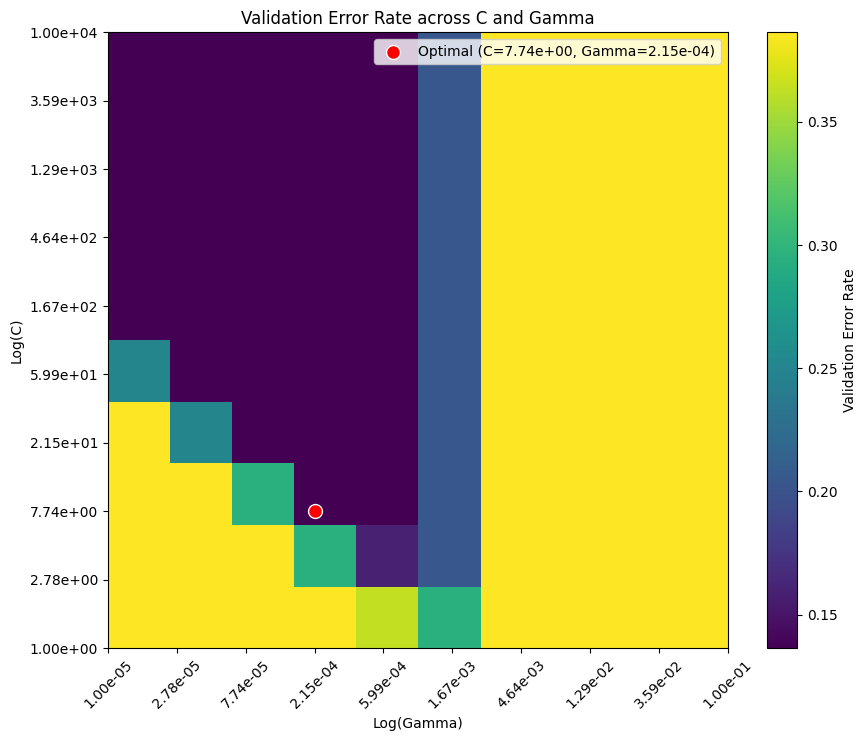

Validation Error Rate: 0.13636363636363635
Test Error Rate: 0.18181818181818177


In [ ]:
number_images = 435

images, indexes = data_loading(path_base="./Faces/", number_images=number_images)
hog_images, X = HOG(images, number_images)
Y = labelize_men_woman(number_images)
X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, X_train_max = data_preprocessing(
    X, Y, indexes, number_images, train_size = 0.7, test_size = 0.15
)
gamma_optimal, c_optimal = crossvalidation(X_train, X_val, Y_train, Y_val)
results_train, results_val, results_test, err_val, err_test = learn_optimal_parameters(
    X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, gamma_optimal, c_optimal
)

print("Validation Error Rate:", err_val)
print("Test Error Rate:", err_test)

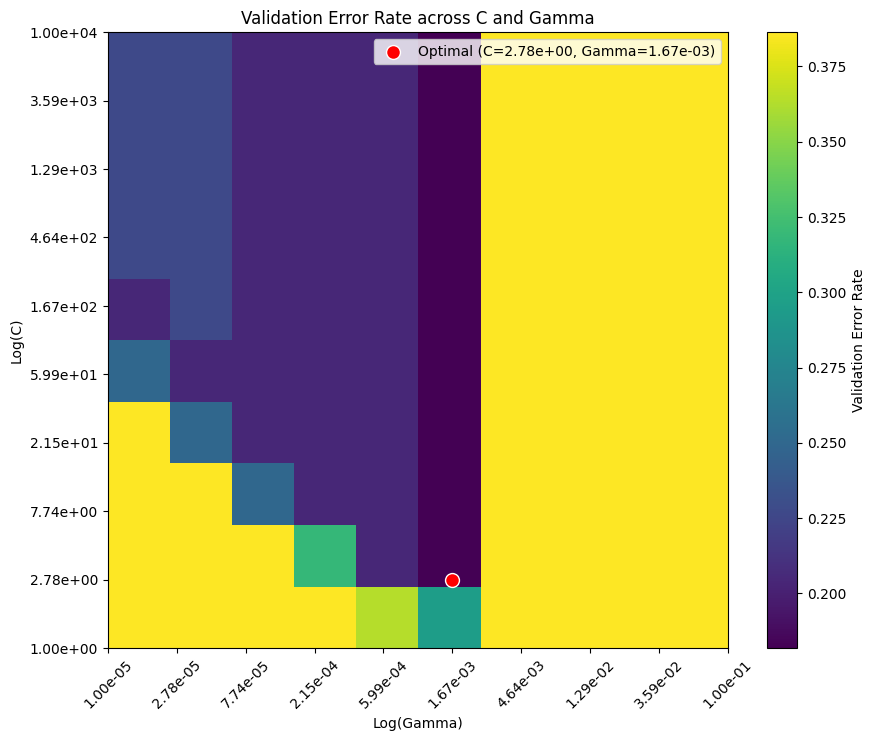

Validation Error Rate: 0.18181818181818177
Test Error Rate: 0.2727272727272727


In [ ]:
number_images = 435

images, indexes = data_loading(path_base="./Faces/", number_images=number_images)
hog_images, X = HOG(images, number_images)
Y = labelize_men_woman(number_images)
X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, X_train_max = data_preprocessing(
    X, Y, indexes, number_images, train_size = 0.6, test_size = 0.2
)
gamma_optimal, c_optimal = crossvalidation(X_train, X_val, Y_train, Y_val)
results_train, results_val, results_test, err_val, err_test = learn_optimal_parameters(
    X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, gamma_optimal, c_optimal
)

print("Validation Error Rate:", err_val)
print("Test Error Rate:", err_test)

On observe que l'erreur de test de nos premiers entra√Ænements pour l'identification du sexe d'un individu est plus √©l√©v√© que l'erreur de validation : c'est un cas de surapprentissage (ou overfitting). Cela peut √™tre d√ª √† un jeu d'apprentissage trop grand par rapport aux donn√©es de validation et de test. 

Ce surapprrentissage n'est cependant pas √©tonnant avec nos donn√©es, en d√©pit de valeur classiques de s√©paration du jeu de donn√©es (en 0.7/0.15/0.15 puis 0.6/0.2/0.2 respectivement pour apprentissage/validation/test), car en effet plusieurs photos d'une m√™me personne repr√©sentant la m√™me classe cr√©e une redondance trop importante dans l'information. 

On tente donc de r√©duire la taille de l'ensemble d'apprentissage, avec la s√©paration 0.5/0.25/0.25. 

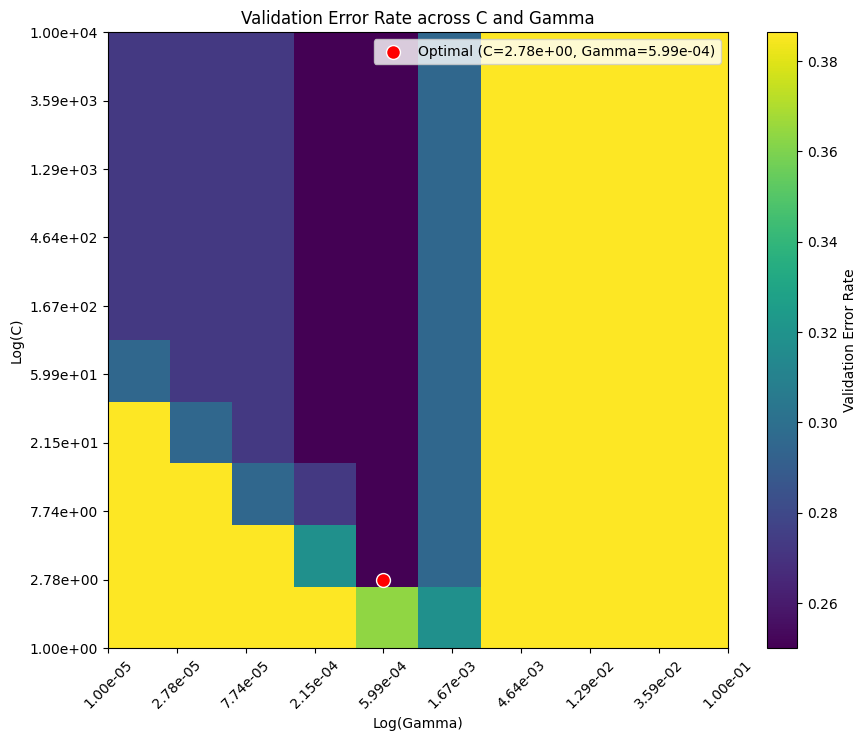

Validation Error Rate: 0.25
Test Error Rate: 0.18181818181818177


In [ ]:
number_images = 435

images, indexes = data_loading(path_base="./Faces/", number_images=number_images)
hog_images, X = HOG(images, number_images)
Y = labelize_men_woman(number_images)
X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, X_train_max = data_preprocessing(
    X, Y, indexes, number_images, train_size = 0.5, test_size = 0.25
)
gamma_optimal, c_optimal = crossvalidation(X_train, X_val, Y_train, Y_val)
results_train, results_val, results_test, err_val, err_test = learn_optimal_parameters(
    X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, gamma_optimal, c_optimal
)

print("Validation Error Rate:", err_val)
print("Test Error Rate:", err_test)

Le taux d'erreur de test a bien diminu√©, et l'on a plus d'overfitting. Un taux d'erreur de 20% n'est pas utilisable pour une application directe, mais en aggr√©gant plus de donn√©es, ou en apprenant des hyperparam√®tres suppl√©mentaires (comme la taille de la fen√™tre dans HOG par exemple). 

Sachant que l'on a 2 classes, donc que la probabilit√© de bien classifier une image au hasard est de 1/2, notre mod√®le est 1.5 fois plus performant que le hasard. 

#### C) HOG pour la reconnaissance d'objets

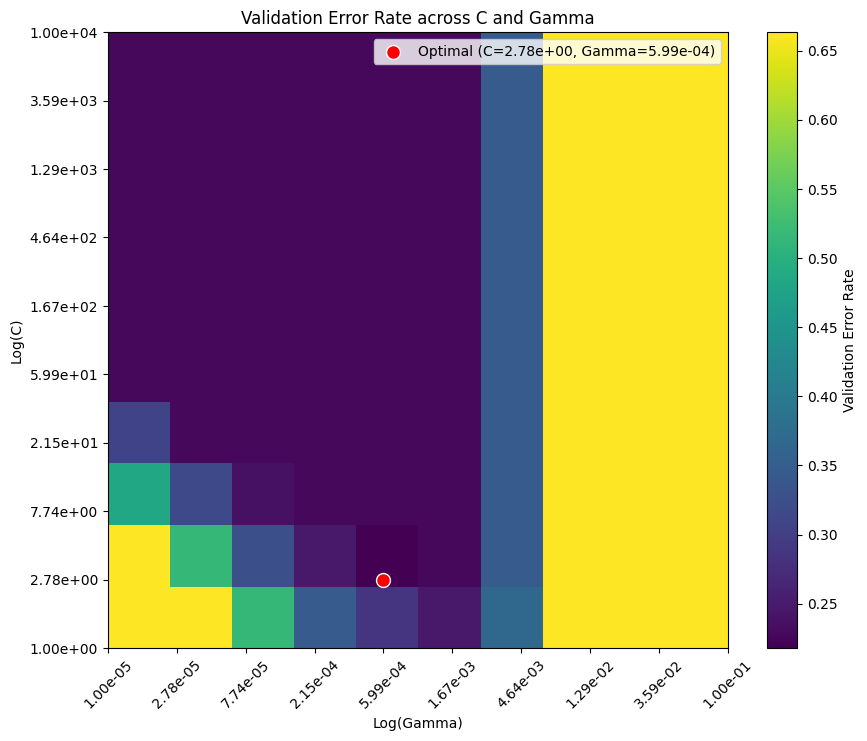

C = 2.7826, Gamma = 0.0006

Erreur de validation : 0.2178
Erreur de test : 0.2178


In [ ]:
base_path = "./dataset" 

images, labels, indexes, label_map = load_dataset_from_folders(base_path, to_gray=True)

number_images = len(images)
hog_images, X = HOG(images, number_images)


X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, X_train_max = data_preprocessing(
    X, labels, indexes, number_images, train_size = 0.6, test_size = 0.2
)

gamma_optimal, c_optimal = crossvalidation(X_train, X_val, Y_train, Y_val)
print(f"C = {c_optimal:.4f}, Gamma = {gamma_optimal:.4f}")


results_train, results_val, results_test, err_val, err_test = learn_optimal_parameters(
    X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, gamma_optimal, c_optimal
)

print(f"\nErreur de validation : {err_val:.4f}")
print(f"Erreur de test : {err_test:.4f}")




L'erreur de test est de 22% pour une classification de 4 classes, correspond √† une performance 1.5 plus √©lev√©e que le hasard. 

### Conclusion 

Sur des relativement petis jeux de donn√©es, nous arrivont √† cr√©er des mod√®les plus performants que le hasard en couplant HOG √† un SVM.

L'apprentissage de nos mod√®les n'est pas directement applicable √† une utilisation r√©elle, mais montre que les m√©thodes de couplage de HOG, et d'apprentissage automatique sont dignes d'int√©r√™t. 

On pourrait am√©liorer nos r√©sultats en utilisant divers mod√®les d'apprentissage automatique, comme les CNN.

# 6. üìä Analyse

Prenons de la distance et ajoutons du relief. Avantages, limites, concurrents et futur du HOG !

### Avantages

**Robuste aux changements d'√©clairage** gr√¢ce √† la nomalisation des blocs. 

**Invariant aux changements de pose** tant que les variations de pose ou d'angle de vue sont mod√©r√©s.

**Facilit√© d'impl√©mentation** avec sa simplicit√© de mise en oeuvre, il est de plus disponible dans des biblioth√®ques telle que OpenCV. 

### Limites

**Sensibilit√© aux changements d'√©chelle importants**, en effet il n'est invariant qu'√† de l√©gers changements d'√©chelle puisqu'il balaye l'image avec des cellules de diff√©rentes tailles mais dans une plage fix√©e a priori. 

**Vuln√©rabilit√© au bruit et transformations complexes** comme des variations de perspectives ou des objets particuli√®rement d√©form√©s.

**Moins performant pour de la d√©tection d'objets complexes ou de haute pr√©cision** car repose sur des descripteurs bas niveau. 

### Comparaison des performances avec d'autres m√©thodes

### √Ä prendre en compte avant toutes comparaisons !

HOG est principalement un **extracteur de caract√©ristique**, auquel on peut adjoindre diff√©rents **classifieurs**. Ici, nous le comparerons √† d'autres extracteurs ainsi qu'√† des **d√©tecteurs** complets, dans ce second cas ce sera le HOG adjoint d'un SVM lin√©aire que l'on comparera. 

### Autres extracteurs de caract√©ristiques

**SIFT (Scale-Invariant Feature Transform)** : 

\+ Invariant aux  changements d'√©chelle et aux rotations

\- Plus co√ªteux en termes de calcul, donc moins adapt√©s pour du temps r√©el

**SURF (Speeded-Up Robust Features)** : 

\+ Version optimis√©e de SIFT, plus rapide 

\- ...mais l√©g√®rement moins pr√©cis

\- Brevet√©, ce qui limite son utilisation dans certaines applications commerciales. N'est plus disponible sur OpenCV

\- Reste toujours moins rapide que HOG

**ORB (Oriented FAST and Rotated BRIEF)** : 

\+ Alternative non brevet√© de SURF

\+ Combine la d√©tection rapide des caract√©ristiques et un descripteur BRIEF am√©lior√© pour une invariance √† la rotation

\- Reste toujours moins rapide que HOG

###  Autre d√©tecteur d'objet

**(F)CNN ((Fully) Convolutional Neural Networks)**

_tels que YOLO (You Only Look Once) et SSD (Single Shot Detector)_

\+ Surpassent HOG pour la d√©tection de caract√©ristiques complexes, meilleure pr√©cision

\- Requi√®rent des ressources de calcul plus √©lev√©es

\- N√©cessitent des ensembles de donn√©es volumineux pour un entra√Ænement efficace

### Benchmark des m√©thodes 
_pour l'extraction de caract√©ristiques avec les m√©thodes HOG, SIFT et ORB d'OpenCV, sur le dataset de visages vu dans la partie application_

| M√©thode | Temps moyen (s) | Points cl√©s moyens    |
|---------|-----------------|-----------------------|
| HOG     | 0.0003          | Pas de points cl√©s    |
| SIFT    | 0.0026          | 46.38                |
| ORB     | 0.0013          | 248.57               |

In [ ]:
import cv2
import numpy as np
import time

def benchmark_feature_detectors(images):
    results = {
        'HOG': {'time': []},
        'SIFT': {'time': [], 'keypoints': []},
        'ORB': {'time': [], 'keypoints': []}
    }
    
    # Initialisation des d√©tecteurs
    # HOG
    hog = cv2.HOGDescriptor()
    
    # SIFT
    sift = cv2.SIFT_create()
    
    # ORB
    orb = cv2.ORB_create()
    
    # Boucle sur toutes les images
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # ---- HOG ----
        start_time = time.time()
        hog_features = hog.compute(gray)
        results['HOG']['time'].append(time.time() - start_time)
        
        # ---- SIFT ----
        start_time = time.time()
        keypoints_sift, _ = sift.detectAndCompute(gray, None)
        results['SIFT']['time'].append(time.time() - start_time)
        results['SIFT']['keypoints'].append(len(keypoints_sift))
        
        # ---- ORB ----
        start_time = time.time()
        keypoints_orb, _ = orb.detectAndCompute(gray, None)
        results['ORB']['time'].append(time.time() - start_time)
        results['ORB']['keypoints'].append(len(keypoints_orb))
    
    return results

# Exemple d'utilisation
if __name__ == "__main__":
    # Simulation d'un tableau de 435 images RGB (128, 128)
    np.random.seed(42)
    images = np.random.randint(0, 256, (435, 128, 128, 3), dtype=np.uint8)

    # Ex√©cution du benchmark
    results = benchmark_feature_detectors(images)

    # Affichage des r√©sultats
    for method, data in results.items():
        avg_time = np.mean(data['time'])
        if 'keypoints' in data:
            avg_keypoints = np.mean(data['keypoints'])
            print(f"{method} - Temps moyen: {avg_time:.4f}s, Points cl√©s moyens: {avg_keypoints:.2f}")
        else:
            print(f"{method} - Temps moyen: {avg_time:.4f}s (Pas de points cl√©s)")

HOG - Temps moyen: 0.0004s (Pas de points cl√©s)
SIFT - Temps moyen: 0.0028s, Points cl√©s moyens: 46.38
ORB - Temps moyen: 0.0013s, Points cl√©s moyens: 248.57


### Que conclure de cette partie ?

HOG offre une solution **simple et efficace** pour la d√©tection d'objets dans des sc√©narios simples et en **temps r√©el**, les **CNN** sont pr√©f√©r√©s pour des t√¢ches n√©cessitant une **pr√©cision** plus √©lev√©e et une gestion de la complexit√© visuelle. 

Concr√®tement, HOG sera une bonne solution pour une impl√©mentation en **aide √† la conduite**, permettant une r√©ponse rapide, efficace, et relativement peu co√ªteuse. Dans un v√©hicule enti√®rement autonome cependant, ses performances imparfaites font qu'il ne peut √™tre la **seule** reconnaissance mise en place. Une **solution hybride**, combinant sa rapidit√© et l'efficacit√© d'une autre m√©thode telle que les CNN, serait n√©cessaire. 

Cela nous am√®ne √† la derni√®re sous-partie de l'analyse...

### Am√©liorations et Perspectives

### Am√©liorations

**Combiner avec des mod√®les d'apprentissage automatique** HOG peut devenir plus pr√©cis, par exemple en utilisant un SVM non-lin√©aire ou un CNN comme classifieur. R√©sultat plus **pr√©cis** qu'avec un HOG, plus **rapide** qu'avec un CNN !

**Utiliser des filtres de d√©bruitage** tels que des filtres Gaussien permet de r√©duire la sensibilit√© au bruit du HOG.

**Optimiser les param√®tres pour des applications sp√©cifiques**, en changeant la taille des cellules ou le nombre de bins dans l'histogramme par exemple, afin de s'adapter √† la situation si celle-ci est connue en avance. 

### Perspectives

_o√π on voit les portes ouvertes par les am√©liorations pr√©c√©dentes_

Dans la **surveillance du traffic urbain** son utilisation en pr√©-traitement pour un CNN permet une acc√©l√©ration n√©cessaire de celui-ci quand les v√©hicules d√©filent √† 130km/h.

Pour de la **reconnaissance faciale** on peut penser que la capacit√© d'adaptation du HOG √† diverses luminosit√© en fait un bon candidat pour reconna√Ætre le visage de l'utilisateur qui veut d√©verouiller son t√©l√©phone en pleine nuit, mais la tr√®s faible luminosit√© peut induire un bruit : l'usage d'un filtre de d√©bruitage en amont permet de profiter des qualit√©s du HOG dans ce domaine.

Dans des applications tr√®s sp√©cifiques telle que la **reconnaissance de cellules tumorales**, le fait de conna√Ætre les images types attendues permets de param√©trer aux mieux nos diff√©rentes plages et les forts changements d'√©chelles par exemple ne sont plus une limite. 

# ‚úÖ Conclusion 

**HOG** pour **Histogram of Oriented Gradients**

C'est un **descripteur** cl√© en vision par ordinateur, reconnu pour la d√©tection d'objets comme les pi√©tons. 

Apr√®s avoir d√©taill√© son fonctionnement bas√© sur l'analyse des gradients pour capturer les contours, nous avons examin√© ses applications majeures, notamment en surveillance et en **conduite autonome**. 

Bien qu'il pr√©sente des limites face aux **changements d'√©chelle et au bruit**, il reste une solution **rapide et robuste**, particuli√®rement adapt√©e aux syst√®mes √† ressources limit√©es. 

Son int√©gration avec des mod√®les modernes (CNN) ouvre la voie √† des compromis efficaces entre **performance et complexit√©**.

# üìö R√©f√©rences


- Wikip√©dia. (2024). Histogramme de gradient orient√© - Wikip√©dia, l'encyclop√©die libre. R√©cup√©r√© sur [http://fr.wikipedia.org/w/index.php?title=Histogramme_de_gradient_orient%C3%A9&oldid=219342036](http://fr.wikipedia.org/w/index.php?title=Histogramme_de_gradient_orient%C3%A9&oldid=219342036) (consult√© le 10/10/2024).
- Dalal, N., & Triggs, B. (2005). Histograms of oriented gradients for human detection. In *2005 IEEE Computer Society Conference on Computer Vision and Pattern Recognition (CVPR'05)* (Vol. 1, pp. 886-893). https://doi.org/10.1109/CVPR.2005.177
- Suard, F., Rakotomamonjy, A., Bensrhair, A., & Broggi, A. (2006). Pedestrian Detection using Infrared images and Histograms of Oriented Gradients. In *2006 IEEE Intelligent Vehicles Symposium* (pp. 206-212). [http://www.ce.unipr.it/people/broggi/publications/iv2006-pd-aziz.pdf](http://www.ce.unipr.it/people/broggi/publications/iv2006-pd-aziz.pdf). https://doi.org/10.1109/IVS.2006.1689629
- Hafiz Ahamed, Ishraq Alam, Md. Manirul Islam (2018). In *HOG-CNN Based Real Time Face Recognition*. https://www.researchgate.net/profile/Md-Hafiz-Ahamed/publication/330684381_HOG-CNN_Based_Real_Time_Face_Recognition/links/5c531c58299bf12be3f0e777/HOG-CNN-Based-Real-Time-Face-Recognition.pdf